<a href="https://colab.research.google.com/github/dharshinirajan/PRODIGY_ML_01/blob/main/Prodigy_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install -q pycaret >/dev/null 2>&1 # library used for model trainning and evaluation
!pip install -q scipy

In [4]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

sns.set_palette("pastel")

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

In [6]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')


In [7]:
target=train_df.SalePrice

In [8]:
df = pd.concat([train_df.drop('SalePrice', axis=1), test_df])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
df.MSSubClass=df.MSSubClass.astype('str')

In [11]:
df.drop('Id',axis=1,inplace=True)

In [12]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
describe=df.describe().T
describe['nunique']=df.nunique()
describe['NULLS']=df.isna().sum()
describe

,count,mean,std,min,25%,50%,75%,max,nunique,NULLS
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0,128,486
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0,1951,0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0,10,0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0,9,0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0,118,0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0,61,0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0,444,23
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0,991,1
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0,272,1
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0,1135,1


In [14]:
categorical_1=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
   ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for column in categorical_1:
    df[column] = df[column].fillna("None")

In [15]:
categorical_2=['MasVnrType','MSZoning','Functional','Utilities','SaleType','Exterior2nd','Exterior1st',
         'Electrical' ,'KitchenQual']
for column in categorical_1:
    df[column] = df[column].fillna(df[column].mode()[0])

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def optimize_knn_imputer(data, col, neighbors_list):
    numerical_data = data.select_dtypes(exclude='O')
    clean_numerical_cols = numerical_data.isna().sum()[numerical_data.isna().sum()==0].index

    X_train = numerical_data[clean_numerical_cols][numerical_data[col].isna()==0]
    y_train = numerical_data[col][numerical_data[col].isna()==0]

    X_test = numerical_data[clean_numerical_cols][numerical_data[col].isna()==1]

    param_grid = {'n_neighbors': neighbors_list}

    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(knn, param_grid, cv=5)

    grid_search.fit(X_train, y_train)

    best_n_neighbors = grid_search.best_params_['n_neighbors']
    best_knn = KNeighborsRegressor(n_neighbors=best_n_neighbors)
    best_knn.fit(X_train, y_train)

    y_pred = best_knn.predict(X_test)

    data[col][data[col].isna()==1] = y_pred

    return data

In [17]:
num_f = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
    'BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']

clean_df = df.copy()

for col in num_f:
    clean_df = optimize_knn_imputer(clean_df, col, neighbors_list=[1, 3, 5, 7, 9])

In [18]:
clean_df['TotalArea']=clean_df['LotFrontage']+clean_df['LotArea']

clean_df['Total_Home_Quality'] = clean_df['OverallQual'] + clean_df['OverallCond']

clean_df['Total_Bathrooms'] = (clean_df['FullBath'] + (0.5 * clean_df['HalfBath']) +
                               clean_df['BsmtFullBath'] + (0.5 * clean_df['BsmtHalfBath']))
clean_df["AllSF"] = clean_df["GrLivArea"] + clean_df["TotalBsmtSF"]

clean_df["AvgSqFtPerRoom"] = clean_df["GrLivArea"] / (clean_df["TotRmsAbvGrd"] +
                                                       clean_df["FullBath"] +
                                                       clean_df["HalfBath"] +
                                                       clean_df["KitchenAbvGr"])

clean_df["totalFlrSF"] = clean_df["1stFlrSF"] + clean_df["2ndFlrSF"]

In [19]:
clean_df['MoSold'] = (-np.cos(0.5236 * clean_df['MoSold']))

In [20]:
def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
clean_df['GarageArea_cat'] = clean_df['GarageArea'].apply(Gar_category).astype('str')

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
clean_df['GrLivArea_cat'] = clean_df['GrLivArea'].apply(Low_category).astype('str')

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['1stFlrSF_cat'] = clean_df['1stFlrSF'].apply(fl1_category).astype('str')
clean_df['2ndFlrSF_cat'] = clean_df['2ndFlrSF'].apply(fl1_category).astype('str')

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['TotalBsmtSF_cat'] = clean_df['TotalBsmtSF'].apply(bsmtt_category).astype('str')

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['BsmtUnfSF_cat'] = clean_df['BsmtUnfSF'].apply(bsmt_category).astype('str')

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
clean_df['LotFrontage_cat'] = clean_df['LotFrontage'].apply(lot_category).astype('str')

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
clean_df['LotArea_cat'] = clean_df['LotArea'].apply(lot_category1).astype('str')

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5



clean_df['YearBuilt_cat'] = clean_df['YearBuilt'].apply(year_category).astype('str').astype('str').astype('str')
clean_df['YearRemodAdd_cat'] = clean_df['YearRemodAdd'].apply(year_category).astype('str').astype('str')
clean_df['GarageYrBlt_cat'] = clean_df['GarageYrBlt'].apply(year_category).astype('str')

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

clean_df['MasVnrArea_cat'] = clean_df['MasVnrArea'].apply(vnr_category).astype('str')

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

clean_df['AllSF_cat'] = clean_df['AllSF'].apply(allsf_category).astype('str')

In [21]:
df1=clean_df.copy()

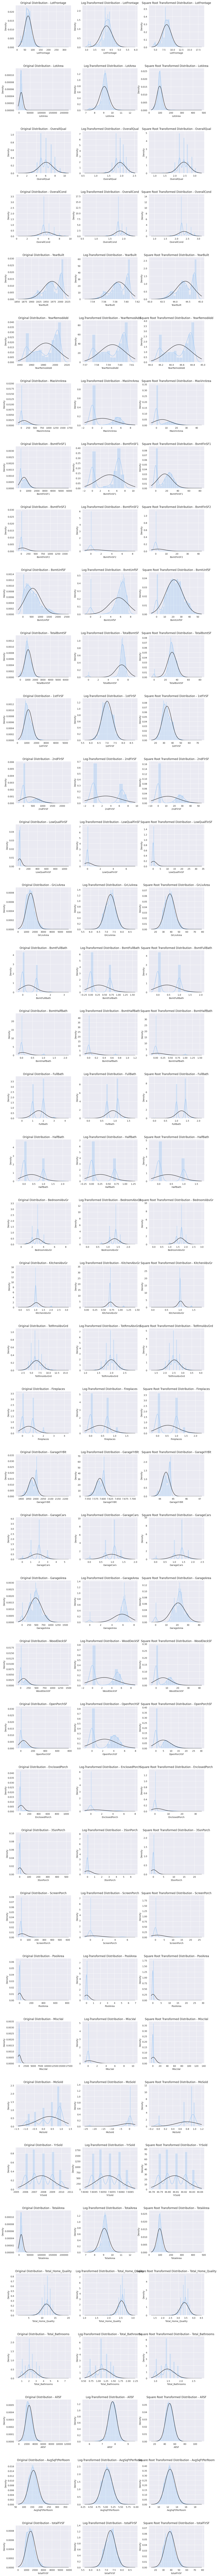

In [22]:
numerical_features = df1.select_dtypes(include=np.number).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=3, figsize=(15, 5 * len(numerical_features)))
fig.subplots_adjust(hspace=0.5)

# Loop through each numerical feature
for i, feature in enumerate(numerical_features):
    # Original Distribution
    sns.distplot(df1[feature], kde=True, ax=axes[i, 0],fit=scipy.stats.norm)
    axes[i, 0].set_title(f'Original Distribution - {feature}')

    # Log-Transformed Distribution
    log_transformed = np.log1p(df1[feature])  # Adding 1 to avoid log(0)
    sns.distplot(log_transformed, kde=True, ax=axes[i, 1],fit=scipy.stats.norm)
    axes[i, 1].set_title(f'Log-Transformed Distribution - {feature}')

    # Square Root Transformed Distribution
    sqrt_transformed = np.sqrt(df1[feature])
    sns.distplot(sqrt_transformed, kde=True, ax=axes[i, 2],fit=scipy.stats.norm)
    axes[i, 2].set_title(f'Square Root Transformed Distribution - {feature}')

plt.show()

In [23]:
skew_df = pd.DataFrame(df1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Original_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df1[feature]))
skew_df['original_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(df1[feature]))

skew_df['log_transformed_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(  np.log1p(df1[feature]) )  )
skew_df['log_transformed_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(  np.log1p(df1[feature]) )  )

skew_df['sqrt_transformed_Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(  np.sqrt(df1[feature]) )  )
skew_df['sqrt_transformed_ kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(  np.sqrt(df1[feature]) )  )




skew_df.set_index('Feature', inplace=True)
skew_df

,Original_Skewness,original_ kurtosis,log_transformed_Skewness,log_transformed_ kurtosis,sqrt_transformed_Skewness,sqrt_transformed_ kurtosis
Feature,,,,,,
LotFrontage,1.327955,10.586956,-0.944672,2.274802,-0.018608,2.664461
LotArea,12.822431,264.496632,-0.504751,3.745614,3.081847,32.333365
OverallQual,0.197110,0.065049,-0.647413,2.167482,-0.256685,0.839599
OverallCond,0.570312,1.474860,-0.746183,6.131385,-0.125133,3.279905
YearBuilt,-0.599806,-0.512497,-0.626215,-0.457086,-0.612961,-0.485114
YearRemodAdd,-0.451020,-1.346181,-0.458157,-1.338547,-0.454589,-1.342378
MasVnrArea,2.601549,9.260036,0.508603,-1.612320,1.045043,0.007321
BsmtFinSF1,1.425513,6.893135,-0.618026,-1.464034,-0.011791,-1.211286
BsmtFinSF2,4.146057,18.809825,2.458622,4.228040,2.980103,7.970568


In [24]:
to_log1p=['LotArea','MasVnrArea','BsmtFinSF2','1stFlrSF','LowQualFinSF','GrLivArea','KitchenAbvGr','TotRmsAbvGrd'
         ,'GarageYrBlt','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
         ,'TotalArea','AllSF','AvgSqFtPerRoom','totalFlrSF']
to_sqrt=['LotFrontage','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtHalfBath','Total_Bathrooms',]
for col in to_log1p:
    df1[col]=np.log1p (df1[col])
for col in to_sqrt:
    df1[col]=np.sqrt (df1[col])

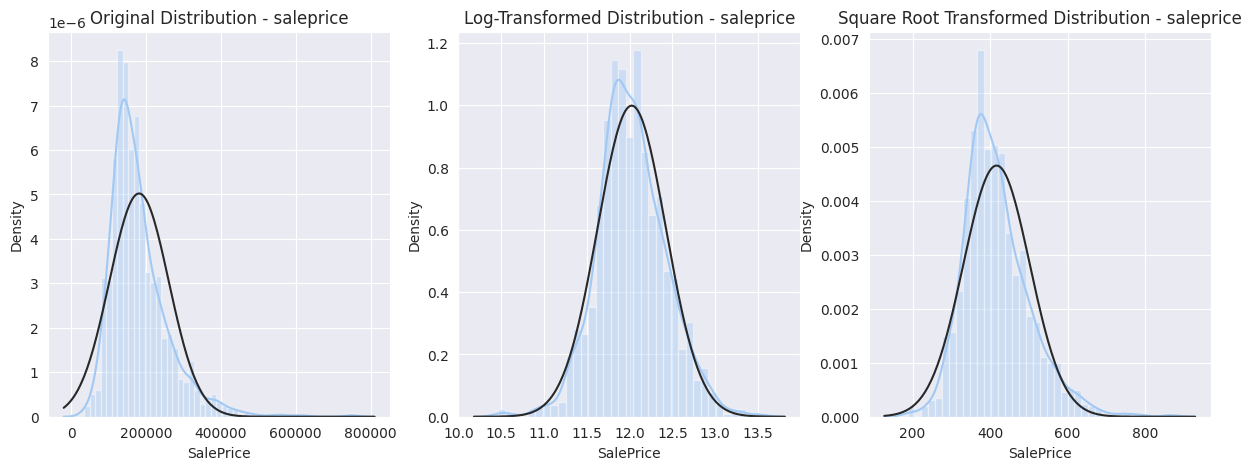

original skew = 1.880940746034036 
original kurtosis = 6.509812011089439
log skew = 0.12122191311528363 
log kurtosis = 0.8026427107468055
sqrt skew = 0.9421834681211159 
sqrt kurtosis = 1.9469987212364908


In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5 ))
feature='saleprice'
# Original Distribution
sns.distplot(target, kde=True, ax=axes[0],fit=scipy.stats.norm)
axes[0].set_title(f'Original Distribution - {feature}')


    # Log-Transformed Distribution
log_transformed = np.log1p(target)  # Adding 1 to avoid log(0)
sns.distplot(log_transformed, kde=True, ax=axes[1],fit=scipy.stats.norm)
axes[1].set_title(f'Log-Transformed Distribution - {feature}')

    # Square Root Transformed Distribution
sqrt_transformed = np.sqrt(target)
sns.distplot(sqrt_transformed, kde=True, ax=axes[2],fit=scipy.stats.norm)
axes[2].set_title(f'Square Root Transformed Distribution - {feature}')

plt.show()
print(f'original skew = {scipy.stats.skew(target)} \noriginal kurtosis = {scipy.stats.kurtosis(target)}')
print(f'log skew = { scipy.stats.skew(np.log1p (target) )} \nlog kurtosis = {scipy.stats.kurtosis(np.log1p (target))}')
print(f'sqrt skew = { scipy.stats.skew(np.sqrt (target) )} \nsqrt kurtosis = {scipy.stats.kurtosis(np.sqrt (target))}')

In [26]:
log_target=np.log1p(target)


In [27]:
encoded_df=df1.copy()
encoded_df=pd.get_dummies(df1)
encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 382 entries, LotFrontage to AllSF_cat_7
dtypes: float64(30), int64(11), uint8(341)
memory usage: 1.9 MB


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_df=pd.DataFrame(robust_scaler.fit_transform(encoded_df), index=encoded_df.index, columns=encoded_df.columns)
scaled_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt_cat_3,GarageYrBlt_cat_4,GarageYrBlt_cat_5,MasVnrArea_cat_1,MasVnrArea_cat_2,MasVnrArea_cat_3,MasVnrArea_cat_4,AllSF_cat_1,AllSF_cat_2,AllSF_cat_7
0,-0.249457,-0.256995,0.5,0.0,0.631579,0.256410,1.034716,0.272857,0.0,-0.691481,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.473494,0.035356,0.0,3.0,0.063158,-0.435897,0.000000,0.446542,0.0,-0.351392,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.098678,0.398758,0.5,0.0,0.589474,0.230769,0.997612,0.105713,0.0,-0.057423,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.508709,0.023391,0.5,0.0,-1.221053,-0.589744,0.000000,-0.165709,0.0,0.120214,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.654541,0.941998,1.0,0.0,0.568421,0.179487,1.147836,0.236746,0.0,0.038830,...,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_train=scaled_df.iloc[:1460]
y_train=log_target
X_test=scaled_df.iloc[1460:]

In [31]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [32]:
from pycaret.regression import setup, compare_models
from pycaret.regression import *
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
pycaret_setup = setup(data=pd.concat([X_train, y_train], axis=1), target='SalePrice',session_id=1183)

,Description,Value
0,Session id,1183
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 383)"
4,Transformed data shape,"(1460, 383)"
5,Transformed train set shape,"(1021, 383)"
6,Transformed test set shape,"(439, 383)"
7,Numeric features,382
8,Preprocess,True
9,Imputation type,simple


In [33]:
compare_models(['catboost','br','omp','ridge','gbr'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0772,0.0137,0.1158,0.9096,0.0089,0.0065,11.5910
br,Bayesian Ridge,0.0776,0.0138,0.1152,0.9080,0.0089,0.0065,0.1230
ridge,Ridge Regression,0.0840,0.0149,0.1207,0.8995,0.0093,0.0070,0.0990
omp,Orthogonal Matching Pursuit,0.0848,0.0156,0.1232,0.8960,0.0095,0.0071,0.1070
gbr,Gradient Boosting Regressor,0.0863,0.0166,0.1276,0.8904,0.0098,0.0072,1.1590


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [34]:
catboost,br,omp,ridge,gbr=create_model('catboost',verbose=False),create_model('br',verbose=False),create_model('omp',verbose=False),create_model('ridge',verbose=False),create_model('gbr',verbose=False)

In [35]:
catboost.fit(X_train,y_train,verbose=False)
catboost_prediction=np.exp(catboost.predict(X_test))
catboost_submission = pd.concat([test_df['Id'], pd.Series(catboost_prediction, name='SalePrice')], axis=1)
catboost_submission.to_csv('cat_boost_submission_try1.csv', index=False, header=True)

In [36]:
br.fit(X_train,y_train)
br_prediction=np.exp(br.predict(X_test))
br_submission = pd.concat([test_df['Id'], pd.Series(br_prediction, name='SalePrice')], axis=1)
br_submission.to_csv('br_try1.csv', index=False, header=True)

In [37]:
omp.fit(X_train,y_train)
omp_prediction=np.exp(omp.predict(X_test))
omp_submission = pd.concat([test_df['Id'], pd.Series(omp_prediction, name='SalePrice')], axis=1)
omp_submission.to_csv('omp_try1.csv', index=False, header=True)

In [38]:
ridge.fit(X_train,y_train)
ridge_prediction=np.exp(ridge.predict(X_test))
ridge_submission = pd.concat([test_df['Id'], pd.Series(ridge_prediction, name='SalePrice')], axis=1)
ridge_submission.to_csv('ridge_try1.csv', index=False, header=True)

In [39]:
gbr.fit(X_train,y_train)
gbr_prediction=np.exp(gbr.predict(X_test))
gbr_submission = pd.concat([test_df['Id'], pd.Series(gbr_prediction, name='SalePrice')], axis=1)
gbr_submission.to_csv('gbr_try1.csv', index=False, header=True)

In [40]:
models = {
    "br": br,
    "catboost": catboost,
    "omp": omp,
    'GBR':gbr,
    "ridge": ridge

}
predictions = (
    0.4 * np.exp(models['br'].predict(X_test)) +
    0.4 * np.exp(models['catboost'].predict(X_test)) +
    0.1 * np.exp(models['omp'].predict(X_test)) +
     0.05 * np.exp(models['GBR'].predict(X_test)) +
    0.05 * np.exp(models['ridge'].predict(X_test))

)
ensemble_submission = pd.concat([test_df['Id'], pd.Series(predictions, name='SalePrice')], axis=1)
ensemble_submission.to_csv('ensemble_try_2.csv', index=False, header=True)